In [1]:
import pandas as pd
import numpy as np

In [2]:
# read data
nutz_data_0 = pd.read_excel("/home/philipp/Data/edin_diss/SAP_nutz/FB_171-178_MA_2006_2020.xlsx")
nutz_data_1 = pd.read_excel("/home/philipp/Data/edin_diss/SAP_nutz/FB_179-182_MA_2006_2020.xlsx")

# concat data
nutz_data = pd.concat([nutz_data_0, nutz_data_1])

del nutz_data_0
del nutz_data_1

In [3]:
nutz_data.head()

,Waldort,Wirtschafts-/Schutzwald,Derbholz/Nicht-Derbholz,Altersgruppe 1.Sch.,Nutzungsart,planmäßig,Ernteverfahren,Rückungsart,Sorte,Erntenummer-Projekt,Projekt: Gültig ab,Abmaßkontrollperiode,Abmaßjahr,Laubholz EFM,Nadelholz EFM,Nicht zugeordnet EFM,Gesamtergebnis EFM
0,#/171/1/#,Nicht zugeordnet,DH,#,Nicht zugeordnet,Nicht zugeordnet,Harvester,Forwarder,gehackt,1/200060,2020-05-01 00:00:00,9,2020,NaN,1.0,NaN,1.0
1,#/171/1/#,Nicht zugeordnet,DH,#,Nicht zugeordnet,Nicht zugeordnet,Sortimentsverfahren,Seil bergauf,nicht gehackt,1/190070,2019-03-10 00:00:00,4,2019,NaN,2.0,NaN,2.0
2,#/171/1/#,Nicht zugeordnet,DH,#,Nicht zugeordnet,Nicht zugeordnet,Sortimentsverfahren,Seil bergauf,nicht gehackt,1/190070,2019-03-10 00:00:00,5,2019,NaN,10.0,NaN,10.0
3,#/171/1/9,Nicht zugeordnet,DH,#,Durchforstung,planmäßig,Sortimentsverfahren,Sonstiges,Brennholz II,1/#,#,5,2016,22.0,NaN,NaN,22.0
4,#/171/1/533A4,Nicht zugeordnet,DH,#,Erstdurchforstung,planmäßig,Sortimentsverfahren,Händisch,Brennholz II,1/#,#,3,2020,5.0,NaN,NaN,5.0


In [4]:
nutz_data.loc[:,'Waldort']

0                #/171/1/#
1                #/171/1/#
2                #/171/1/#
3                #/171/1/9
4            #/171/1/533A4
                ...       
303099    1355/182/5/297O6
303100    1355/182/5/297O7
303101    1355/182/5/297O7
303102    1355/182/5/521A1
303103    1355/182/5/521G1
Name: Waldort, Length: 1264299, dtype: object

In [5]:
# split WO naming
ids = nutz_data.iloc[:,0].str.split('/')
# transform series into numpy array
ids = np.array(ids.to_list())

In [6]:
ids

array([['#', '171', '1', '#'],
       ['#', '171', '1', '#'],
       ['#', '171', '1', '#'],
       ...,
       ['1355', '182', '5', '297O7'],
       ['1355', '182', '5', '521A1'],
       ['1355', '182', '5', '521G1']], dtype='<U5')

In [7]:
# add wo informaiton to dataframe
nutz_data['to'] = ids[:,0]
nutz_data['fb'] = ids[:,1]
nutz_data['fr'] = ids[:,2]
nutz_data['wo'] = ids[:,3]

In [8]:
nutz_data = nutz_data.replace('#','0')

In [9]:
nutz_data[['to','fb','fr']] = nutz_data[['to','fb','fr']].astype(int)

In [10]:
nutz_data.columns

Index(['Waldort', 'Wirtschafts-/Schutzwald', 'Derbholz/Nicht-Derbholz',
       'Altersgruppe 1.Sch.', 'Nutzungsart', 'planmäßig', 'Ernteverfahren',
       'Rückungsart', 'Sorte', 'Erntenummer-Projekt', 'Projekt: Gültig ab',
       'Abmaßkontrollperiode', 'Abmaßjahr', 'Laubholz EFM', 'Nadelholz EFM',
       'Nicht zugeordnet EFM', 'Gesamtergebnis EFM', 'to', 'fb', 'fr', 'wo'],
      dtype='object')

In [11]:
nutz_data[nutz_data['Projekt: Gültig ab']=='0'].shape

(343683, 21)

In [12]:
nutz_data[nutz_data['Projekt: Gültig ab']!='0'].shape

(920616, 21)

In [13]:
# percentage of records without project start
print(nutz_data[nutz_data['Projekt: Gültig ab']=='0'].shape[0]/nutz_data.shape[0])
print(nutz_data[nutz_data['Projekt: Gültig ab']!='0'].shape[0]/nutz_data.shape[0])

0.2718368044268009
0.7281631955731991


In [14]:
# percentage of volume cutted without project start
print(nutz_data.loc[nutz_data['Projekt: Gültig ab']=='0', 'Gesamtergebnis EFM'].sum() / nutz_data.loc[:, 'Gesamtergebnis EFM'].sum())
print(nutz_data.loc[nutz_data['Projekt: Gültig ab']!='0', 'Gesamtergebnis EFM'].sum() / nutz_data.loc[:, 'Gesamtergebnis EFM'].sum())

0.1618990273680804
0.8381009726319195


In [15]:
print(nutz_data.loc[nutz_data['wo']=='0', 'Gesamtergebnis EFM'].sum() / nutz_data.loc[:, 'Gesamtergebnis EFM'].sum())
print(nutz_data.loc[nutz_data['wo']!='0', 'Gesamtergebnis EFM'].sum() / nutz_data.loc[:, 'Gesamtergebnis EFM'].sum())


0.01986894361428297
0.980131056385717


In [16]:
nutz_data.columns

Index(['Waldort', 'Wirtschafts-/Schutzwald', 'Derbholz/Nicht-Derbholz',
       'Altersgruppe 1.Sch.', 'Nutzungsart', 'planmäßig', 'Ernteverfahren',
       'Rückungsart', 'Sorte', 'Erntenummer-Projekt', 'Projekt: Gültig ab',
       'Abmaßkontrollperiode', 'Abmaßjahr', 'Laubholz EFM', 'Nadelholz EFM',
       'Nicht zugeordnet EFM', 'Gesamtergebnis EFM', 'to', 'fb', 'fr', 'wo'],
      dtype='object')

In [17]:
for col in ['Wirtschafts-/Schutzwald', 'Derbholz/Nicht-Derbholz',
       'Altersgruppe 1.Sch.', 'Nutzungsart', 'planmäßig', 'Ernteverfahren',
       'Rückungsart', 'Sorte',
       'Abmaßkontrollperiode', 'Abmaßjahr']:
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    print(col)
    print(nutz_data[col].unique())

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Wirtschafts-/Schutzwald
['Nicht zugeordnet' 'WW' 'SW']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Derbholz/Nicht-Derbholz
['DH' 'NDH']
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Altersgruppe 1.Sch.
['0' 80 50 140 30 150 40 120 60 130 160 20 90 100 70 10 110 180 190 200
 170 230 210 '160' '50' '140' '170' '40' '150' '180' '20' '80' '30' '110'
 '120' '60' '70' '100' '90' '10' '130' '190' '220' '200' '210' '230' 240
 220 255 250]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Nutzungsart
['Nicht zugeordnet' 'Durchforstung' 'Erstdurchforstung' 'Räumung'
 'Schäden Wind' 'Schäden Käfer' 'Trassenaufhieb' 'Kahlhieb'
 'Jungwuchsfreistellung' 'Schäden andere' 'Säuberung' 'Verkehrssicherung'
 'Zielstärkennutzung' 'Lichtung' 'Schäden Schnee' 'Abdeckung'
 'Bestandesumwandlung' 'Absäumung' 'Gliederungshieb' 'Überhälterentnahme'
 'Schäden Fangbäume' 'Niederdurchforstu

In [18]:
nutz_data.columns = ['waldort', 'economy', 'wood_thick',
       'age_1st', 'ma', 'calamity', 'harvest_cut',
       'harvest_transp', 'quality', 'project_nr', 'date_start',
       'month_end', 'year_end', 'v_lh', 'v_nh',
       'v_nan', 'v_tot', 'to', 'fb', 'fr', 'wo']

In [19]:
nutz_data.iloc[573336:573346,8:15]

,quality,project_nr,date_start,month_end,year_end,v_lh,v_nh
573336,Brennholz I,9980-07-01 00:00:00,2000-01-01 00:00:00,2,2014,14.0,NaN
573337,Brennholz II,9980-07-01 00:00:00,2000-01-01 00:00:00,2,2014,3.0,NaN
573338,Faserholz,7/#,0,4,2014,15.0,NaN
573339,Brennholz,7/#,0,2,2014,5.0,NaN
573340,Faserholz,7/#,0,3,2014,53.0,NaN
573341,Bloche,7/123100,2012-03-15 00:00:00,8,2012,NaN,16.0
573342,Bloche,7/120050,2012-02-27 00:00:00,3,2012,NaN,111.0
573343,Bloche,7/120050,2012-02-27 00:00:00,4,2012,NaN,7.0
573344,Faserholz,7/120050,2012-02-27 00:00:00,3,2012,NaN,11.0
573345,Faserholz,7/120050,2012-02-27 00:00:00,4,2012,NaN,40.0


In [20]:
# ToDo
# create dictionaries
# convert to numbers
# fill nan
# set dtypes

In [21]:

dict_ww_sw = {'Nicht zugeordnet':0, 'WW':1, 'SW':2}
dict_wood = {'DH':1, 'NDH':2}
dict_ma = {'Nicht zugeordnet':'0', 'Durchforstung':'DF', 'Erstdurchforstung':'DE', 'Niederdurchforstung':'ND', \
           'Schäden Wind':'SW', 'Schäden Käfer':'SK', 'Schäden Lawinen':'SL', 'Schäden Schnee':'SS', \
           'Schäden Fangbäume':'SF', 'Schäden andere':'SA', 'Kahlhieb':'KH', 'Lichtung':'LI', 'Abdeckung':'AD', \
           'Räumung':'RM', 'Zielstärkennutzung':'ZN', 'Jungwuchsfreistellung':'JF', 'Trassenaufhieb':'TR', \
           'Säuberung':'SB', 'Verkehrssicherung':'VS', 'Bestandesumwandlung':'BU', 'Femelung':'FM', \
           'Absäumung':'AS', 'Gliederungshieb':'GH', 'Überhälterentnahme':'UE', 'Aushieb':'AH', \
           'Plenterung':'PL',  'Loslösung':'LL', 'Aush. forstl.Einteilungsl.':'AE', \
           'AA':'AA', 'VE':'VE', 'VF':'VF', 'JU':'JU'}
dict_plan = {'Nicht zugeordnet':0, 'planmäßig':1, 'zufällig':2}
dict_harvest = {'Nicht zugeordnet':0, 'Baumverfahren':1, 'Stammverfahren':2, 'Sortimentsverfahren':3, \
                'Harvester':4, 'Baumverfahren abgezopft u. grob geastet':5, 'Seil-Harvester':6, 0:0, 20:2}
dict_rueck = {'Nicht zugeordnet':0, 'Händisch':10, 'Seil (bis 2009)':20, 'Seil bergauf':23, 'Seil bergab':26, \
              'Seil Langstrecke':29, 'Schlepper':30, 'Traktor':31, 'Forwarder':35, 'Seil-Forwarder':36, \
              'Hubschrauber':38, 'Sonstiges':40, 'Holz verbleibt am Wa':90}
dict_quality = {'Nicht zugeordnet':0, 'Brennholz I':1, 'Brennholz II':2, 'Brennholz III':3, 'Brennholz':4, \
              'Langholz':5, 'Doppelbloche':6, 'Bloche':7, 'Schwachbloch':8, 'Kürzungsbloche':9, 'Übergröße':10, \
              'Derbstangen':11, 'Maste':12, 'Reisstangen':13, 'Schwellenrundholz':14, 'Sonst. Nutzholz':15, \
              'Faserholz':16, 'Manipulationsholz':17, 'Splitterholz':18, 'Sekundaholz':19, 'Schleifholz':20, \
              'Rohholz thermisch au':21, 'Hackgut thermisch au':22, 'gehackt':23, 'nicht gehackt':24, \
              'Rücklaßholz':25, 'Ausschuss':26}


In [22]:
nutz_data_copy = nutz_data.copy()

In [23]:
nutz_data['economy'] = nutz_data['economy'].replace(dict_ww_sw)
nutz_data['wood_thick'] = nutz_data['wood_thick'].replace(dict_wood)
nutz_data['ma'] = nutz_data['ma'].replace(dict_ma)
nutz_data['calamity'] = nutz_data['calamity'].replace(dict_plan)
nutz_data['harvest_cut'] = nutz_data['harvest_cut'].replace(dict_harvest)
nutz_data['harvest_transp'] = nutz_data['harvest_transp'].replace(dict_rueck)
nutz_data['quality'] = nutz_data['quality'].replace(dict_quality)

In [25]:
nutz_data = nutz_data.fillna(0)

In [27]:
nutz_data.columns

Index(['waldort', 'economy', 'wood_thick', 'age_1st', 'ma', 'calamity',
       'harvest_cut', 'harvest_transp', 'quality', 'project_nr', 'date_start',
       'month_end', 'year_end', 'v_lh', 'v_nh', 'v_nan', 'v_tot', 'to', 'fb',
       'fr', 'wo'],
      dtype='object')

In [28]:
nutz_data['economy'] = nutz_data['economy'].astype(np.uint8)
nutz_data['wood_thick'] = nutz_data['wood_thick'].astype(np.uint8)
nutz_data['age_1st'] = nutz_data['age_1st'].astype(np.uint16)
nutz_data['ma'] = nutz_data['ma'].astype(str)
nutz_data['calamity'] = nutz_data['calamity'].astype(np.uint8)
nutz_data['harvest_cut'] = nutz_data['harvest_cut'].astype(np.uint8)
nutz_data['harvest_transp'] = nutz_data['harvest_transp'].astype(np.uint8)
nutz_data['quality'] = nutz_data['quality'].astype(np.uint8)
nutz_data['project_nr'] = nutz_data['project_nr'].astype(str)
nutz_data['month_end'] = nutz_data['month_end'].astype(np.uint8)
nutz_data['year_end'] = nutz_data['year_end'].astype(np.uint16)
nutz_data['v_lh'] = nutz_data['v_lh'].astype(np.float32)
nutz_data['v_nh'] = nutz_data['v_nh'].astype(np.float32)
nutz_data['v_nan'] = nutz_data['v_nan'].astype(np.float32)
nutz_data['v_tot'] = nutz_data['v_tot'].astype(np.float32)
nutz_data['to'] = nutz_data['to'].astype(np.uint16)
nutz_data['fb'] = nutz_data['fb'].astype(np.uint8)
nutz_data['fr'] = nutz_data['fr'].astype(np.uint8)
nutz_data['wo'] = nutz_data['wo'].astype(str)

In [29]:
nutz_data

,waldort,economy,wood_thick,age_1st,ma,calamity,harvest_cut,harvest_transp,quality,project_nr,...,month_end,year_end,v_lh,v_nh,v_nan,v_tot,to,fb,fr,wo
0,#/171/1/#,0,1,0,0,0,4,35,23,1/200060,...,9,2020,0.0,1.0,0.0,1.0,0,171,1,0
1,#/171/1/#,0,1,0,0,0,3,23,24,1/190070,...,4,2019,0.0,2.0,0.0,2.0,0,171,1,0
2,#/171/1/#,0,1,0,0,0,3,23,24,1/190070,...,5,2019,0.0,10.0,0.0,10.0,0,171,1,0
3,#/171/1/9,0,1,0,DF,1,3,40,2,1/#,...,5,2016,22.0,0.0,0.0,22.0,0,171,1,9
4,#/171/1/533A4,0,1,0,DE,1,3,10,2,1/#,...,3,2020,5.0,0.0,0.0,5.0,0,171,1,533A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303099,1355/182/5/297O6,1,1,40,SK,2,3,31,4,5/#,...,12,2019,0.0,2.0,0.0,2.0,1355,182,5,297O6
303100,1355/182/5/297O7,1,1,40,DE,1,3,31,4,5/#,...,12,2020,0.0,15.0,0.0,15.0,1355,182,5,297O7
303101,1355/182/5/297O7,1,1,40,SK,2,3,31,4,5/#,...,12,2019,0.0,1.0,0.0,1.0,1355,182,5,297O7
303102,1355/182/5/521A1,1,1,100,SK,2,3,31,4,5/#,...,10,2020,0.0,13.0,0.0,13.0,1355,182,5,521A1


In [33]:
nutz_data.loc[0,'date_start']

0    2020-05-01 00:00:00
0    2018-10-25 00:00:00
Name: date_start, dtype: object

In [35]:
nutz_data['wo'].unique()

array(['0', '9', '533A4', ..., '297O1', '297O4', '297O6'], dtype=object)

In [38]:
print(nutz_data[nutz_data['wo']=='950A1'].shape[0]/nutz_data.shape[0])
print(nutz_data[nutz_data['wo']!='950A1'].shape[0]/nutz_data.shape[0])

0.0013746748198013286
0.9986253251801986


In [39]:
print(nutz_data.loc[(nutz_data['wo']=='0') | (nutz_data['wo']=='950A1'), 'v_tot'].sum() / nutz_data.loc[:, 'v_tot'].sum())
print(nutz_data.loc[(nutz_data['wo']!='0') | (nutz_data['wo']!='950A1'), 'v_tot'].sum() / nutz_data.loc[:, 'v_tot'].sum())


0.022199623
1.0


In [41]:
nutz_data['WO'] = nutz_data['fb'].astype(str) + \
nutz_data['fr'].astype(str).str.zfill(2) + \
nutz_data['wo'].astype(str).str.zfill(5)

In [42]:
nutz_data

,waldort,economy,wood_thick,age_1st,ma,calamity,harvest_cut,harvest_transp,quality,project_nr,...,year_end,v_lh,v_nh,v_nan,v_tot,to,fb,fr,wo,WO
0,#/171/1/#,0,1,0,0,0,4,35,23,1/200060,...,2020,0.0,1.0,0.0,1.0,0,171,1,0,1710100000
1,#/171/1/#,0,1,0,0,0,3,23,24,1/190070,...,2019,0.0,2.0,0.0,2.0,0,171,1,0,1710100000
2,#/171/1/#,0,1,0,0,0,3,23,24,1/190070,...,2019,0.0,10.0,0.0,10.0,0,171,1,0,1710100000
3,#/171/1/9,0,1,0,DF,1,3,40,2,1/#,...,2016,22.0,0.0,0.0,22.0,0,171,1,9,1710100009
4,#/171/1/533A4,0,1,0,DE,1,3,10,2,1/#,...,2020,5.0,0.0,0.0,5.0,0,171,1,533A4,17101533A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303099,1355/182/5/297O6,1,1,40,SK,2,3,31,4,5/#,...,2019,0.0,2.0,0.0,2.0,1355,182,5,297O6,18205297O6
303100,1355/182/5/297O7,1,1,40,DE,1,3,31,4,5/#,...,2020,0.0,15.0,0.0,15.0,1355,182,5,297O7,18205297O7
303101,1355/182/5/297O7,1,1,40,SK,2,3,31,4,5/#,...,2019,0.0,1.0,0.0,1.0,1355,182,5,297O7,18205297O7
303102,1355/182/5/521A1,1,1,100,SK,2,3,31,4,5/#,...,2020,0.0,13.0,0.0,13.0,1355,182,5,521A1,18205521A1


In [43]:
nutz_data.to_csv('/home/philipp/Data/edin_diss/SAP_nutz/nutzungen_2006_2020.csv')

In [3]:
##############################################
###   calc ststistics
##############################################

In [2]:
nutz_data = pd.read_csv('/home/philipp/Data/edin_diss/SAP_nutz/nutzungen_2006_2020.csv')

In [3]:
# repair error
nutz_data.loc[nutz_data['date_start'] == '19.09.1022', 'date_start'] = '2011-11-07 00:00:00'

In [4]:
sap_nutz_proj = nutz_data[nutz_data['date_start'] != '0'].copy()

In [5]:
sap_nutz_proj = sap_nutz_proj.drop(['Unnamed: 0', 'waldort'], axis=1)

In [6]:
sap_nutz_proj.shape

(920616, 21)

In [7]:
sap_nutz_proj

,economy,wood_thick,age_1st,ma,calamity,harvest_cut,harvest_transp,quality,project_nr,date_start,...,year_end,v_lh,v_nh,v_nan,v_tot,to,fb,fr,wo,WO
0,0,1,0,0,0,4,35,23,1/200060,2020-05-01 00:00:00,...,2020,0.0,1.0,0.0,1.0,0,171,1,0,1710100000
1,0,1,0,0,0,3,23,24,1/190070,2019-03-10 00:00:00,...,2019,0.0,2.0,0.0,2.0,0,171,1,0,1710100000
2,0,1,0,0,0,3,23,24,1/190070,2019-03-10 00:00:00,...,2019,0.0,10.0,0.0,10.0,0,171,1,0,1710100000
5,0,1,0,RM,1,3,30,7,1/90140,2009-01-15 00:00:00,...,2009,99.0,0.0,0.0,99.0,0,171,1,533E0,17101533E0
6,0,1,0,RM,1,3,30,7,1/90140,2009-01-15 00:00:00,...,2009,134.0,51.0,0.0,185.0,0,171,1,533E0,17101533E0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264271,1,1,90,TR,1,2,31,18,5/190010,2019-01-17 00:00:00,...,2019,0.0,0.0,0.0,0.0,1355,182,5,297I0,18205297I0
1264276,1,1,170,SK,2,2,31,7,5/200010,2020-01-08 00:00:00,...,2020,0.0,55.0,0.0,55.0,1355,182,5,297M3,18205297M3
1264277,1,1,170,SK,2,2,31,18,5/200010,2020-01-08 00:00:00,...,2020,0.0,5.0,0.0,5.0,1355,182,5,297M3,18205297M3
1264281,1,1,160,SK,2,2,31,7,5/200010,2020-01-08 00:00:00,...,2020,0.0,47.0,0.0,47.0,1355,182,5,297N1,18205297N1


In [8]:
sap_nutz_proj = sap_nutz_proj.groupby('project_nr').first()

In [9]:
sap_nutz_proj

,economy,wood_thick,age_1st,ma,calamity,harvest_cut,harvest_transp,quality,date_start,month_end,year_end,v_lh,v_nh,v_nan,v_tot,to,fb,fr,wo,WO
project_nr,,,,,,,,,,,,,,,,,,,,
1/100010,1,1,130,SK,2,1,30,24,2010-03-11 00:00:00,7,2010,0.0,14.00,0.0,14.00,1033,173,1,514F1,17301514F1
1/100020,1,1,120,DE,1,1,30,15,2010-05-11 00:00:00,5,2010,0.0,10.00,0.0,10.00,1033,173,1,409E1,17301409E1
1/100030,1,1,170,SK,2,1,26,19,2010-09-24 00:00:00,10,2010,0.0,2.00,0.0,2.00,1033,173,1,473C1,17301473C1
1/100040,1,1,30,DE,1,1,23,7,2010-03-20 00:00:00,3,2010,0.0,20.00,0.0,20.00,1033,173,1,410A2,17301410A2
1/100050,1,1,70,DE,1,4,35,7,01.01.2010,4,2010,0.0,10.03,0.0,10.03,1190,172,1,193A1,17201193A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980-07-01 00:00:00,1,1,100,SW,2,3,40,1,2000-01-01 00:00:00,10,2014,11.0,0.00,0.0,11.00,1048,171,7,461D0,17107461D0
9980-08-01 00:00:00,1,1,150,RM,1,3,30,1,2000-01-01 00:00:00,4,2012,14.0,0.00,0.0,14.00,1040,174,8,436C1,17408436C1
9980-09-01 00:00:00,0,1,0,DF,1,3,10,1,2010-02-11 00:00:00,7,2016,11.0,0.00,0.0,11.00,0,171,9,UZ120,17109UZ120


In [10]:
sap_nutz_proj['s'] = sap_nutz_proj['year_end'].astype(str) +'-'+ sap_nutz_proj['month_end'].astype(str).str.zfill(2) +'-28'

In [11]:
sap_nutz_proj

,economy,wood_thick,age_1st,ma,calamity,harvest_cut,harvest_transp,quality,date_start,month_end,...,v_lh,v_nh,v_nan,v_tot,to,fb,fr,wo,WO,s
project_nr,,,,,,,,,,,,,,,,,,,,,
1/100010,1,1,130,SK,2,1,30,24,2010-03-11 00:00:00,7,...,0.0,14.00,0.0,14.00,1033,173,1,514F1,17301514F1,2010-07-28
1/100020,1,1,120,DE,1,1,30,15,2010-05-11 00:00:00,5,...,0.0,10.00,0.0,10.00,1033,173,1,409E1,17301409E1,2010-05-28
1/100030,1,1,170,SK,2,1,26,19,2010-09-24 00:00:00,10,...,0.0,2.00,0.0,2.00,1033,173,1,473C1,17301473C1,2010-10-28
1/100040,1,1,30,DE,1,1,23,7,2010-03-20 00:00:00,3,...,0.0,20.00,0.0,20.00,1033,173,1,410A2,17301410A2,2010-03-28
1/100050,1,1,70,DE,1,4,35,7,01.01.2010,4,...,0.0,10.03,0.0,10.03,1190,172,1,193A1,17201193A1,2010-04-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980-07-01 00:00:00,1,1,100,SW,2,3,40,1,2000-01-01 00:00:00,10,...,11.0,0.00,0.0,11.00,1048,171,7,461D0,17107461D0,2014-10-28
9980-08-01 00:00:00,1,1,150,RM,1,3,30,1,2000-01-01 00:00:00,4,...,14.0,0.00,0.0,14.00,1040,174,8,436C1,17408436C1,2012-04-28
9980-09-01 00:00:00,0,1,0,DF,1,3,10,1,2010-02-11 00:00:00,7,...,11.0,0.00,0.0,11.00,0,171,9,UZ120,17109UZ120,2016-07-28


In [12]:
sap_nutz_proj['s']

project_nr
1/100010               2010-07-28
1/100020               2010-05-28
1/100030               2010-10-28
1/100040               2010-03-28
1/100050               2010-04-28
                          ...    
9980-07-01 00:00:00    2014-10-28
9980-08-01 00:00:00    2012-04-28
9980-09-01 00:00:00    2016-07-28
9980-10-01 00:00:00    2011-02-28
9980-12-01 00:00:00    2011-11-28
Name: s, Length: 12688, dtype: object

In [13]:
sap_nutz_proj['date_start'] = pd.to_datetime(sap_nutz_proj['date_start'])

In [14]:
sap_nutz_proj['date_end'] = pd.to_datetime(sap_nutz_proj['s'])

In [15]:
sap_nutz_proj['date_end']

project_nr
1/100010              2010-07-28
1/100020              2010-05-28
1/100030              2010-10-28
1/100040              2010-03-28
1/100050              2010-04-28
                         ...    
9980-07-01 00:00:00   2014-10-28
9980-08-01 00:00:00   2012-04-28
9980-09-01 00:00:00   2016-07-28
9980-10-01 00:00:00   2011-02-28
9980-12-01 00:00:00   2011-11-28
Name: date_end, Length: 12688, dtype: datetime64[ns]

In [16]:
sap_nutz_proj['date_delta'] = (sap_nutz_proj['date_end'] - sap_nutz_proj['date_start']).astype('timedelta64[ns]')

In [17]:
print("mean = " + str(sap_nutz_proj['date_delta'].mean()))
print("median = " + str(sap_nutz_proj['date_delta'].median()))
print("std = " + str(sap_nutz_proj['date_delta'].std()))

mean = 126 days 03:48:34.501891
median = 72 days 00:00:00
std = 270 days 10:12:12.241757


In [22]:
sap_nutz_proj['date_delta']

project_nr
1/100010               139 days
1/100020                17 days
1/100030                34 days
1/100040                 8 days
1/100050               117 days
                         ...   
9980-07-01 00:00:00   5414 days
9980-08-01 00:00:00   4501 days
9980-09-01 00:00:00   2359 days
9980-10-01 00:00:00   4076 days
9980-12-01 00:00:00   4349 days
Name: date_delta, Length: 12688, dtype: timedelta64[ns]

In [24]:
# convert timedelta to int
sap_nutz_proj['duration_days'] = (sap_nutz_proj['date_delta'] / np.timedelta64(1, 'D')).astype(int)

In [18]:
import matplotlib
import matplotlib.pyplot as plt

(-10, 500)

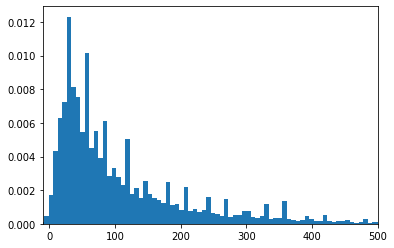

In [28]:
num_bins = 1000

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(sap_nutz_proj['duration_days'], num_bins, density=True)
ax.set_xlim(-10, 500)